# Project Business Statistics: E-news Express


## Business Overview

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

## Problem statement
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


### Objective of analysis

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [ ]:
#Connecting the google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the csv file (dataset) from the google drive connected above
df = pd.read_csv('/content/drive/MyDrive/2. Module 2 - exercise files/Project 2 - Enews Express/abtest (1).csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Viewing the first and last few rows of the dataset

In [ ]:
#Using the pandas .head() function to view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Observation:

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

In [ ]:
#Using the pandas .tail() function to view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


####Checking the shape of the dataset

In [ ]:
df.shape

(100, 6)



*   There are a total of 100 rows representing 100 users as mentioned in the problem statement and 6 columns.



####Checking the datatype of the variables

In [ ]:
#inspecting the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 2 numeric and 4 categorical columns/variables in the given dataset.
Although, we will have to change the user_id data type from integer to category as we would want to exclude that column from numerical data analysis.

####Changing 'user_id' column to object type/categorical column.

We need to change the user_id column from int to category as to exclude it from the numerical columns as it is a unique id given to each user, which can be well interpreted as a categorical variable.

In [ ]:
df['user_id']=df.user_id.astype('category')

# Verifying the change being done
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    object  
 2   landing_page            100 non-null    object  
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    object  
 5   language_preferred      100 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 9.0+ KB


As we can verify above, the datatype of the user_id column has been succesfully changed.

####Statistical summary of the numercial variables of the dataset.

In [ ]:
#To obtain the statistical summary of the numerical columns of the dataset
df.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


*   The time_spent_on_the_page is the only numercial column in the dataset.
*   The average time spent on the page is 5.37 minutes.
*   The minimum time spent on the page is 0.19 minutes and the maximum being 10.72 minutes.





#### Checking for missing values

In [ ]:
#Getting the total null values in each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values is the datset as observed above.

#### Checking for duplicates

In [ ]:
# Checking for duplicates in 'user_id' column
set_user_id = set(df['user_id'])

contain_duplicates = len(df['user_id']) != len(set_user_id)

if len(df['user_id']) != len(set_user_id):
  print('The column user_id contains dupplicates')

else:
  print('The column user_id does not contain any duplicates')

The column user_id does not contain any duplicates


Since there are no duplicates in the user_id column, it is safe to assume that other columns would not have any duplicate values as well since the user_id column governs the unique identification of each user in the sample group.

####Exploring categorical variables

In [ ]:
#Viewing the statistical summary of categorical variables
df.describe(include=object)

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34




*  The count of the variables is 100, same as the sample space/total users, as given in the problem statement.
*  The unique levels to the variable group, is 2 as there are two groups 'Control Group' and 'Treatment group', having 50 users each.
*   Each group has been divided to test the existing landing page and the new landing page. Therefore 2 unique variables.
*   The 'Converted' Columns would also have two unique responses as 'Yes' and 'No' in that column.
*   The frequency 50 represents the division of the sample into two groups of 50 each.





### Univariate Analysis

####Analysing the time spent on the landing page

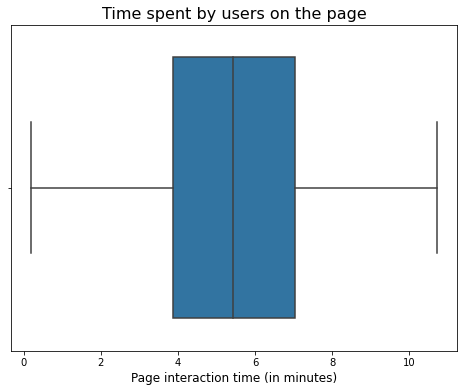

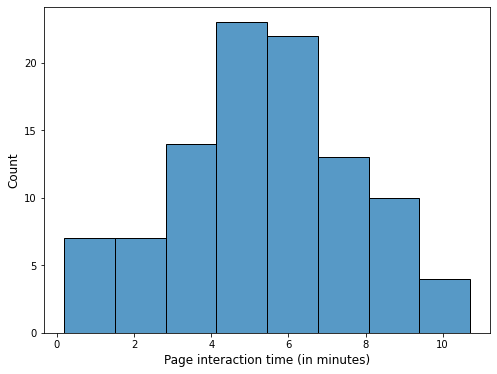

In [ ]:
#Visualising the distribution using boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.xlabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.title('Time spent by users on the page', fontsize = 16)
plt.show()

#Visualaising the distribution using histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='time_spent_on_the_page', )
plt.xlabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.ylabel('Count', fontsize = 12)
plt.show()

In [ ]:
# Total time spent on the page (in minutes) by the group of 100 users.
round(df['time_spent_on_the_page'].sum(),2)

537.78

The total time spent by all users on the landing page is 537 minutes.

####Analysing the converted number of users

In [ ]:
#Counting the number of converted and non-converted users
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

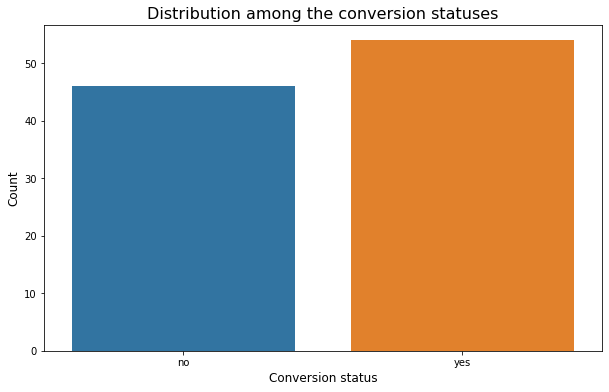

In [ ]:
# Visualising the above distribution using countplot
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='converted')

# Applying labels to the visualised graph
plt.rc('font', size = 14)
plt.xlabel('Conversion status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution among the conversion statuses', fontsize = 16)
plt.show()

 - The above numbers can be translated as 54 users (out of 100) testing the landing page became a subscriber of Enews express, which is encouraging.
 - But we shall analyse it further to understand the distribution of this figure among the new and old landing page.

####Analysing the distribution of the users in the landing page column

In [ ]:
#Counting the distribution of users testing the two landing pages
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

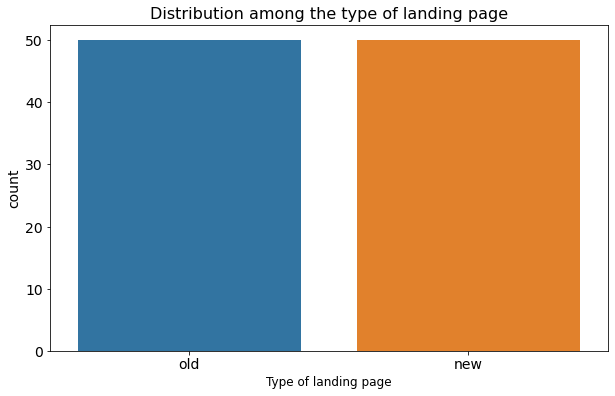

In [ ]:
#Visualising the above distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='landing_page')

# Applying labels to the visualised graph
plt.xlabel('Type of landing page', fontsize = 12)
plt.title('Distribution among the type of landing page', fontsize = 16)
plt.show()

The groups are equally divided into two user groups (50 each) to test the new landing page and the old landing page, as mentioned in the problem statement.

####Population distribution of the two groups

In [ ]:
# Counting the user distribution among the two groups
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

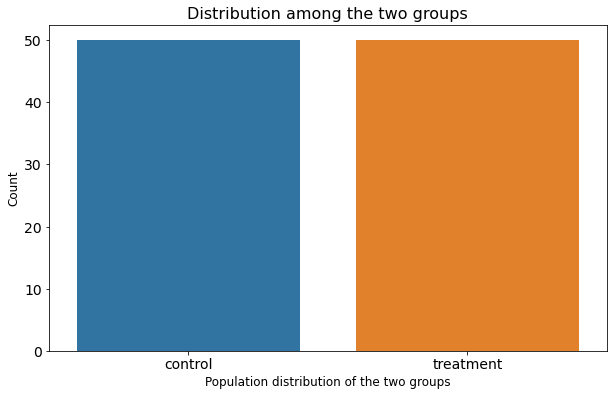

In [ ]:
#Visualising the above distribution using countplot
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='group')

# Applying labels to the visualised graph
plt.xlabel('Population distribution of the two groups', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution among the two groups', fontsize = 16)
plt.show()

As mentioned in the problem statement, the two groups have equal number of 50 users each. 

####Analysing the ditribution of the language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

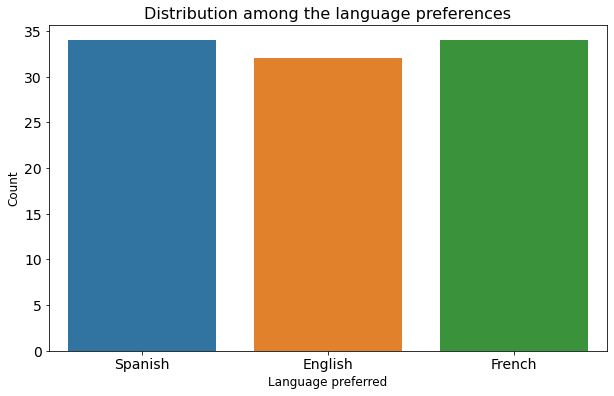

In [ ]:
#Visualising the above distribution using countplot
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='language_preferred')

# Applying labels to the visualised graph
plt.xlabel('Language preferred', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution among the language preferences', fontsize = 16)
plt.show()



*   All 3 languages seem to have almost equal language preference among the users selected.
*   Spanish (34) and French (34) has exactly equal language preference while English being slightly lesser preffered language with a difference of 2 users (32).



### Bivariate Analysis

####Time spent on the page vs Conversion rate

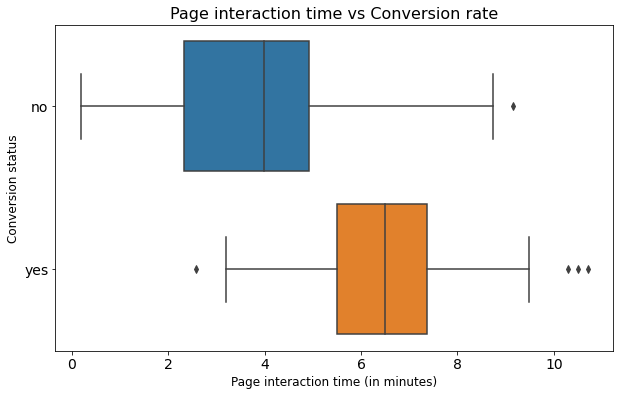

In [ ]:
# Visualising the the relation between two variables using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x ='time_spent_on_the_page', y = 'converted')

# Applying labels to the visualised graph
plt.xlabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.ylabel('Conversion status', fontsize = 12)
plt.title('Page interaction time vs Conversion rate', fontsize = 16)
plt.show()

- It is indeed clear that the people spending more time on the page or interacting with the page are getting converted as a subscriber more often than the users spending less time on the page.
- The succesfully converted users have a few outliers on the right, meaning there are a few users who have interacted with the page for more than the usual range of time and have been converted.

####Time spent on the page vs Language Preference

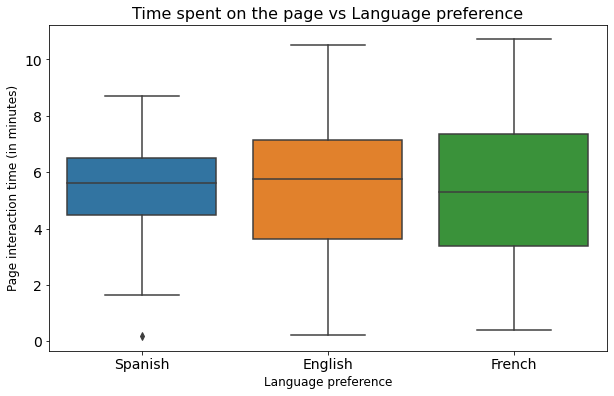

In [ ]:
# Visualising the the relation between two variables using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x ='language_preferred', y = 'time_spent_on_the_page')

# Applying labels to the visualised graph
plt.xlabel('Language preference', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.ylabel('Page interaction time (in minutes)', fontsize = 12)
plt.title('Time spent on the page vs Language preference', fontsize = 16)
plt.show()

- The time spent on the page by Spansih users seems to be less in range as compared to the English and French. Further investigation might be required to understand the particular reason behind this fact.
- There is one outlier observed in the group of spanish users who has almost no page ineraction time. We would need to contact the experiment conducting team to further clarify the reason for this (in case of any errors expereinced in the experiment).
- Although, the median time spent by the 3 different language users seems to be the same.

In [ ]:
#Finding the total time spent by each language user

#Total time spent by English users
english_users = df[df['language_preferred']=='English']
english_users_interaction = english_users['time_spent_on_the_page'].sum()
print('Total Time spent on the page by English users ', round(english_users_interaction, 2), 'minutes')

#Total time spent by French users 
french_users = df[df['language_preferred']=='French']
french_users_interaction = french_users['time_spent_on_the_page'].sum()
print('Total Time spent on the page by French users ',round(french_users_interaction, 2), 'minutes')

#Total time spent by Spanish users
spanish_users = df[df['language_preferred']=='Spanish']
spanish_users_interaction = spanish_users['time_spent_on_the_page'].sum()
print('Total Time spent on the page by Spanish users ', round(spanish_users_interaction, 2), 'minutes')


Total Time spent on the page by English users  177.89 minutes
Total Time spent on the page by French users  178.61 minutes
Total Time spent on the page by Spanish users  181.28 minutes


- The total time spent on the page by the 3 language users seems to be similar.
- With the data above, it does not seem like the language preference has any impact on the page interaction time. We shall investigate it further to be certain about it. 

####Landing Page vs Time spent on the page 

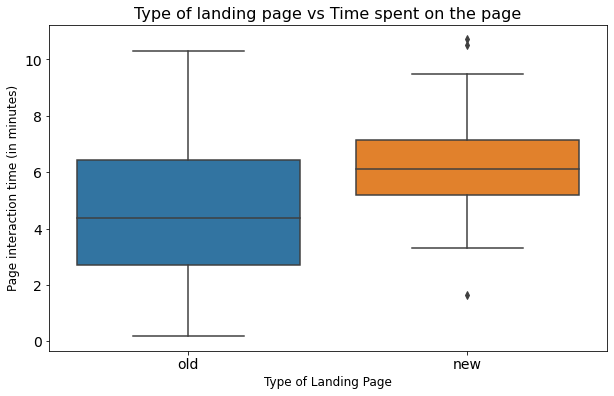

In [ ]:
# Visualising the the relation between two variables using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')

# Applying labels to the visualised graph
plt.ylabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.xlabel('Type of Landing Page', fontsize = 12)
plt.title('Type of landing page vs Time spent on the page', fontsize = 16)
plt.show()

- As clearly observed above, the time spent on the new landing page is far better than the old landing page, an encouraging fact. 
- We shall investigate it further to understand if there is a difference observed with the different language users in terms of the page interaction time.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

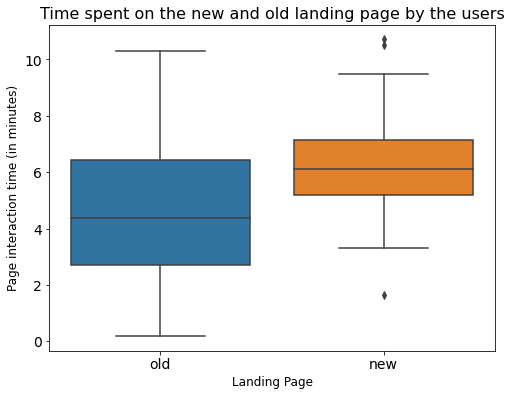

In [ ]:
#Visualing the relationship using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')

# Applying labels to the visualised graph
plt.xlabel('Landing Page', fontsize = 12)
plt.ylabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can be defined as the time spent interacting with the page
plt.title('Time spent on the new and old landing page by the users', fontsize = 16)
plt.show()

### Step 1.1: Define the null and alternate hypotheses

- We want to compare the average (mean) time spent on both the landing pages differ. If they do, we want to test if the new landing page is doing better in terms of the interaction time (time spent on the page) of the users

The null and alternative hypotheses can be formulated as:

> $H_0:$ The average (mean) time spent on the old landing page is equal to the average time spent on the new landing page. <br>
$H_a:$ The average (mean) time spent on the new landing page is greater than the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the new and old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 1.2: Select Appropriate test

*   This is a case of camparing two means from independent poupulations - as the users testing the new and old landing page do not overlap or intersect). 
*   The standard deviations for both the groups/observations are unknown.
*   Continuous data - The time spent is indeed a continuous data and not a discreet data.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
*   List item
*   List item






> Hence, a **2 sample independent t-test** is the most appropriate test for this case.

**Two-sample independent t-test**

In a two-sample independent t-test, we compare the means from two independent populations to check if they differ significantly. We are provided that the sample is randomly selected.

### Step 1.3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 1.4: Collect and prepare data

####Segregating the datasets according to old and new landing page.

In [ ]:
#creating subsets for old and new landing page data
df_new_page = df[df['landing_page'] == 'new']
df_old_page = df[df['landing_page'] == 'old']

#creating subsets for time spent on new landing page
time_on_new_page = df_new_page['time_spent_on_the_page']

#creating subsets for time spent on old landing page
time_on_old_page = df_old_page['time_spent_on_the_page']


We would require the above seggregated datasets or subsets for our calculation on the standard deviation and p-value to validate or invalidate the formulated hypotheses.

####Calculating the standard deviation

In [ ]:
#Assigning sigma_1 variable to the standard deviation of the time spent on the new landing page
sigma_1 = time_on_new_page.std()

#Assigning sigma_2 variable to the standard deviation of the time spent on the old landing page
sigma_2 = time_on_old_page.std()

print('The standard deviation of the sample group spending time on the new landing page is ', round(sigma_1,2))

print('The standard deviation of the sample group spending time on the old landing page is ', round(sigma_2,2))

The standard deviation of the sample group spending time on the new landing page is  1.82
The standard deviation of the sample group spending time on the old landing page is  2.58


The standard deviation is observed to be unequal, which shall be used further while calculating the p-value.

### Step 1.5: Calculate the p-value


- We will use the `ttest_rel` function from the `scipy.stats` library to perform a two-sample independent t-test.
- The `ttest_rel()` function takes the sample observations from the two independent groups, and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the time spent on the new and old landing page of the Enews express website.
    - As it is a one-tailed test, we will compare the mean of the time spent by users on the new landing page with the old landing page by setting the argument `alternative = 'greater'`

In [ ]:
#Importing the required function from the library
from scipy.stats import ttest_ind 

#Calculating the p-value
test_stat, p_value =  ttest_ind(time_on_new_page, time_on_old_page, equal_var = False, alternative = 'greater')

print ('The p-value for the hypothesis formulated is ', p_value)

The p-value for the hypothesis formulated is  0.0001392381225166549


### Step 1.6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 1.7:  Draw inference

At 5% significance level, we reject the null hypothesis that the mean time spent on the new landing page is equal to the mean time spent in the old landing page. Hence, we have enough statistical evidence to say that **the mean time spent on the new landing page is greater than the mean time spent on the old landing page**.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Performing visual analysis

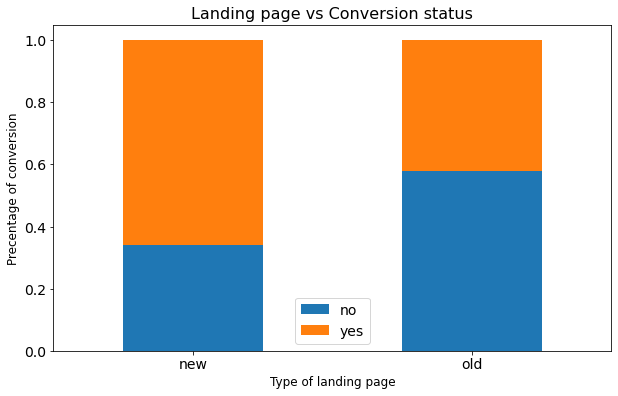

In [ ]:
#Visualing the relationship between the two variables using crosstab function/graph
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked =True,figsize=(10,6))
plt.legend()

#Rotating the labels on the x-axis for better visibility
plt.xticks(rotation=360)

#Applying labels to the visualised graph
plt.rc('font', size=10)
plt.title('Landing page vs Conversion status', fontsize = 16)
plt.xlabel('Type of landing page', fontsize = 12)
plt.ylabel('Precentage of conversion', fontsize = 12)
plt.show()

###Step 2.1: Defining Null and Alternate Hypothesis

* The 'converted'(conversion status) and 'landing_page'(the type of landing page) are two categorical variables.
* We want to see if the proportion of conversion rate of new landing page users is significantly greater than the proportion of users of the old landing page.
* A 'Converted user' can be defined as the user becoming a subscriber of the news website after testing the two (old and new) types of landing pages.

The null and alternate hypthesis can be formulated as:
> $H_0:$ The conversion rate for new landing page is equal to the conversion rate of the old landing page.<br>
> $H_a:$ The conversion rate of the new landing is greater to the conversion rate of the old landing page.

Let $p_1,p_2$ be the proportions of converted users in the treatment (new) group and the control (old) group respectively.

Mathematically, the above formaulated hypotheses can be stated as:

>$H_0:p_1 =p_2$ <br>
>$H_a:p_1 \neq p_2$



### Step 2.2: Select the appropriate test.

The formulated hypotheses are concerned with proportions of two datasets. A test of two proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a **2 sample proportions Z test** for this problem.

##### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either into a control group or a treatment group
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 100\cdot \frac{50}{100} =50 \geq 10\\
n(1-p_1) = 100 \cdot \frac{100-50}{100} =50 \geq 10 \\
np_2 = 100\cdot \frac{50}{100} =50 \geq 10\\
n(1-p_2) = 100 \cdot \frac{100-50}{100} =50 \geq 10 $

The above test satisfies the requirement of the Z-test of two proportions, where the np and n(1-p) are greater than 10.


###Step 2.3: Deciding the significance level.

As given in the problem statement, we select $\alpha = 0.05$.

###Step 2.4: Collect and prepare data

Definitions:

Control group = Users selected to test the existing landing page.

Treatment group = Users selected to tst the new landing page.

In [ ]:
#Creating the subset for the proportion of users converted in treatment group
treatment_converted = df[df['group'] == 'treatment'] ['converted'].value_counts()['yes']

#Creating the subset for the proportion of users converted in control group
control_converted = df[df['group'] == 'control'] ['converted'].value_counts()['yes']

#Calculating the number of total users in each group
n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']

print('The total numbers of users in treatment and control group are {0} and {1} respectively.'.format(n_treatment, n_control))

The total numbers of users in treatment and control group are 50 and 50 respectively.


We would require the above seggregated datasets or subsets for our calculation of the standard deviation and p-value to validate or invalidate the formulated hypotheses.

In [ ]:
print('The number of users converted in the treatment and control group are {0} and {1} respectively'.format(treatment_converted, control_converted))

The number of users converted in the treatment and control group are 33 and 21 respectively


There is a visible difference in the proportion of users being converted from both the groups. We shall test it further to conclude if the difference is significant for us to say that the landing page is performing better.

###Step 2.5: Calulate the p-value

- We will use the `proportions_ztest` function from the `scipy.stats` library to perform a two-sample proportions z-test.
- The `proportions_ztest` function takes the two sample observations from the two independent groups, the number of total observations of the two groups and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the proportion of users in the new and old landing page test groups of the Enews express website.
    - As it is a one-tailed test, we will compare the proportion of users from the new landing page with the old landing page by setting the argument `alternative = 'larger'`

In [ ]:
#Using below code to ignore the warnings in the output
import warnings
warnings.filterwarnings("ignore") 

#Impoting the required test function from the library
from statsmodels.stats.proportion import proportions_ztest

stat, pval_zt = proportions_ztest([treatment_converted, control_converted] , [n_treatment, n_control], alternative = 'larger')

print('The p-value for the hypothesis formulated is ', pval_zt)

The p-value for the hypothesis formulated is  0.008026308204056278


### Step 2.6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if pval_zt < 0.05:
    print(f'As the p-value {pval_zt} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval_zt} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 2.7:  Draw inference

At 5% significance level, we reject the null hypothesis that the conversion rate for the new landing page is equal to the old landing page. In other words, we have enough statistical evidence to say that the **conversion rate of the new landing page is greater than the conversion rate of the old landing page**.

## 3. Is the conversion rate and preferred language independent or related to each other?

### Perform Visual Analysis

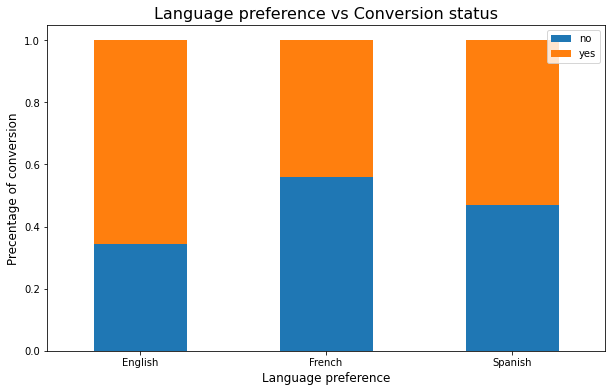

In [ ]:
# using the crosstab visualisation function to display the relationship between the language preference and the conversion status 
pd.crosstab(df['language_preferred'],df['converted'], normalize='index').plot(kind="bar", figsize=(10,6), stacked=True)

#Rotating the labels on the x-axis for better visibility
plt.xticks(rotation=360)

#Applying labels to the visualised graph
plt.legend()
plt.title('Language preference vs Conversion status', fontsize = 16)
plt.xlabel('Language preference', fontsize = 12)
plt.ylabel('Precentage of conversion', fontsize = 12)
plt.show()

###Step 3.1: Define Null and Alternate Hypothesis

* 'converted'/conversion status and 'language_preferred'/language preference are two categorical variables.
* We want to see if the conversion status and preferred language are related or independent.
* Conversion status (yes/no) is defined as the status of the user becoming a subscrber of the news website after using the two (old and new) types of landing page.

We will test the null hypothesis

**$H_0:$ The conversion status is independent of the language preference.**

against the alternate hypthesis

**$H_a:$ The conversion status is NOT independent of the language preference.**


### Step 3.2: Select the appropriate test.

Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

The formulated hypotheses can be tested using a **Chi-square test of independence of attributes**, concerning the two categorical variables, conversion status (yes/no) and language preference (English/French/Spanish).

###Step 3.3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

###Step 3.4: Collect and prepare data

To perform the Chi-squared test of independance we need to create the contingency table. A contingency table is a tabular representation of categorical data. A contingency table shows the number of observations for combinations of values between two categorical variables, in this case 'converted' and 'language_preferred'.

In [ ]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


We have created a two-by-two contingency table, with the counts of 'converted' (Yes or No) in the rows and the counts of 'language preference' (English, French or Spanish) in the columns.

###Step 3.5: Calculate the p-value

- We will use the `chi2_contingency` function from the `scipy.stats` library to perform a chi-square test of independence.
- The `chi2_contingency` function is used to compare to or more categorical datsets. 
- The input in a `chi2_contingency` function is the contingency table where
    - The columns represent different outcomes, like 'conversion status' (yes/no) in this case.
    - The rows are each a different condition, such as the language preference o either English, Spanish or French.
    

In [ ]:
# Importing the required test function from the library.
from scipy.stats import chi2_contingency

# use chi2_contingency() to find the p-value
chi2, p_val, dof, exp_freq = chi2_contingency(contingency_table)

# print the p-value
print('The p-value is', p_val)


The p-value is 0.2129888748754345


### Step 3.6: Compare the p-value with $\alpha$

In [ ]:
#print the conclusion based on p-value
if p_val < 0.05:
    print(f'As the p-value {p_val} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_val} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 3.7:  Draw inference

At 5% significance level, we fail to reject the null hypothesis that the conversion status is independent of the preferred language. In other words, **we do not have enough statistical evidence to say that the conversion status is dependent/related on/to the language preference.**

## 4. Is the time spent on the new page same for the different language users?

### Creating a subset of the users interacting with the new landing page

In [ ]:
# This subset allows us to perform analysis on the users only using the 'new' landing page
df_new = df[df['landing_page'] == 'new']

### Analysing the average time spent by different language users:

In [ ]:
#Using the pandas 'groupby' function to get the average time spent by 3 language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Seems like the average time spent by the 3 language users is almost similar. 

### Perform Visual Analysis

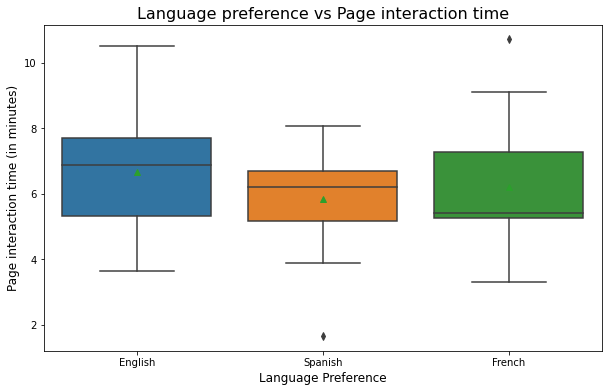

In [ ]:
# Plotting a box plot to visualise the statistical range
plt.figure(figsize=(10,6))
sns.boxplot(data = df_new, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True)

#Applying labels to the visualised graph
plt.title('Language preference vs Page interaction time', fontsize = 16)
plt.xlabel('Language Preference', fontsize = 12)
plt.ylabel('Page interaction time (in minutes)', fontsize = 12) #'time spent on the page' can also be defined as the time spent interacting with the page
plt.show()

The above figure shows that the range of time spent on the new landing page by spanish users is far less than the English and French. However, the average time spent (respresented by the green triangle) seems to be almost similar, while the English users having a slightly higher mean page interaction time.

###Step 4.1: Define Null and Alternate Hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on the new page with respect to each language preference is equal. <br>
> $H_a$ : At least one of the mean time spent on the new landing page with respect to each language preference is different.

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page by English, Spanish and French language users respectively.

Mathematically, the above formulated hypthesis can be stated as:

>$H_0: \mu_1 = \mu_2 = \mu_3$ <br>
>$H_a: $ At least one mean time spent on the new landing page with respect to each language is different from the rest.

###Step 4.2: Select appropriate test

This is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations ,users using new landing page with three different language preference in this case, to test if there is any significant difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, **Shapiro-Wilk’s** test is applied to the response variable.

* For equality of variance, **Levene test** is applied to the response variable.

####Step 4.2.1: Shapiro Wilk's test

We will test the null hypothesis

>$H_0:$ The time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new page does not follow a normal distribution

The test shall be conducted against a level of significance of 5%.

In [ ]:
#We shall find the p-value to validate the test
w, pv_shapiro = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', pv_shapiro)

The p-value is 0.8040016293525696


Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution i.e. the time spent on the new page follows a normal distribution.

####Step 4.2.2: Lavene's test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

The test shall be conducted against a level of significance of 5%.

In [ ]:
#We shall find the p-value to validate the test
statistic, pv_lavene = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'], 
                                    df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                                    df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', pv_lavene)

The p-value is 0.46711357711340173


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances i.e. we can conclude that the popultion variances are equal.

### Step 4.3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$

###Step 4.4: Collect and prepare data

In [ ]:
#Assigning 3 separate variable to store the value of time spent on the page with respect to the 3 languages

#Creating a subset for English users
English_time = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

#Creating a subset for Spanish users
Spanish_time = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

#Creating a subset for French users
French_time = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']

###Step 4.5: Calculate the p-value

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 
    - The sample observations are the values of time spent on the new page with respect to the three languages.

In [ ]:
# importing the required fucntion from the scipy.stats library
from scipy.stats import f_oneway 

# calculating the p-value
test_stat, pval_anova = f_oneway(English_time, French_time, Spanish_time)

print('The p-value for the hypothesis formulated is', pval_anova)

The p-value for the hypothesis formulated is 0.43204138694325955


### Step 4.6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if pval_anova < 0.05:
    print(f'As the p-value {pval_anova} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval_anova} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 4.7:  Draw inference

Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis that the time spent on the new landing page with respect to the language preference is equal i.e. **there is not enough statistical evidence to say that the language preference impacts the time spent on the new landing page**.

## Conclusion and Business Recommendations

###Conclusions:

- The main objective is to drive better customer engagement on the Enews landing page, resulting in acquiring greater number of subscribers. 
- It is clearly observed that the people spending more time on the page or interacting with the page are getting converted as a subscriber more often than the users spending less time on the page. 
- There is enough statistical evidence to show that the new landing page tested through the treatment group is doing better than the old landing page, in terms of conversion rate. 
- We have come across enough statistical evidence to say that the language preference is independent of the conversion status.
- The total time and average time spent on the new landing page spent by the 3 different language users is almost similar. And there is enough statistical evidence to say that the language preference has no role to play in terms of the time spent on the new page.
- Although, the Spanish language users seems to have a lesser range of page interaction time as compared to the English and French language users.
- No available data about the users' gender, occupation, literacy rate or the region they belong to.

### Recommendations:

- We should keep the new landing page as default, as there is enough statistical evidence that the new landing page is doing better in terms of the time spent on the page and resulting in better conversion rates.
- The factor to be considered for our future revisions of the landing page is the page interaction time or the time spent on the page, the higher page interaction time results in higher subscribers/conversion rate.
- Personalized content should be made available to the users, using our machine learning algorithms, to drive better customer retention on the website.
- Since the language preference has no impact on the time spent on the page or the conversion rate, we can consider making our new landing page available in more languages. This shall help us acquire more users, fulfilling the main objective.
- To increase the customer retention rate of the Spanish users, we should analyse the interests of the Spanish language users (Hispanics/Latin) and make more of the related content available.
- More data about the users' genders, occupation and literacy rate can help us optimise our landing pages even further, enabling us to personalise our feed algorithm based on those factors.

___